#  EEG of healthy controls and patients with symptoms of schizophrenia

https://openneuro.org/datasets/ds004000/versions/1.0.0/file-display/README


## Create dataset in correct format

### Download records

In [1]:
! mkdir data

In [2]:
! wget -O data/participants.tsv https://openneuro.org/crn/datasets/ds004000/files/participants.tsv

--2025-05-13 17:40:08--  https://openneuro.org/crn/datasets/ds004000/files/participants.tsv
Resolving openneuro.org (openneuro.org)... 34.107.158.10
Connecting to openneuro.org (openneuro.org)|34.107.158.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3.amazonaws.com/openneuro.org/ds004000/participants.tsv?versionId=S_VsicFFuZVEYIgdtCJgAZJfrwH0xthJ [following]
--2025-05-13 17:40:08--  https://s3.amazonaws.com/openneuro.org/ds004000/participants.tsv?versionId=S_VsicFFuZVEYIgdtCJgAZJfrwH0xthJ
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.51.104, 52.217.194.208, 52.217.94.166, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.51.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 475 [text/plain]
Saving to: ‘data/participants.tsv’

data/participants.t 100%[===================>]     475  --.-KB/s    in 0s      

2025-05-13 17:40:09 (11.4 MB/s) - ‘data/participants.tsv’ saved [475/475]



In [3]:
! curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
! unzip awscliv2.zip
! sudo ./aws/install

! pip install mne

Streaming output truncated to the last 5000 lines.
  inflating: aws/dist/awscli/examples/cloudfront/get-cloud-front-origin-access-identity-config.rst  
  inflating: aws/dist/awscli/examples/cloudfront/get-field-level-encryption-config.rst  
  inflating: aws/dist/awscli/examples/cloudfront/update-field-level-encryption-config.rst  
   creating: aws/dist/awscli/examples/ec2/wait/
  inflating: aws/dist/awscli/examples/ec2/create-network-acl.rst  
  inflating: aws/dist/awscli/examples/ec2/update-security-group-rule-descriptions-egress.rst  
  inflating: aws/dist/awscli/examples/ec2/describe-instance-type-offerings.rst  
  inflating: aws/dist/awscli/examples/ec2/describe-network-interfaces.rst  
  inflating: aws/dist/awscli/examples/ec2/get-verified-access-endpoint-policy.rst  
  inflating: aws/dist/awscli/examples/ec2/get-security-groups-for-vpc.rst  
  inflating: aws/dist/awscli/examples/ec2/describe-flow-logs.rst  
  inflating: aws/dist/awscli/examples/ec2/search-transit-gateway-routes.r

In [4]:
! mkdir data/ds004000-download/

participant_id = '000'
! rm -r data/ds004000-download/
! aws s3 sync --no-sign-request s3://openneuro.org/ds004000/sub-{participant_id}/eeg/ data/ds004000-download/

download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_electrodes.tsv to data/ds004000-download/sub-000_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-000_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-000_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-responder_run-1_eeg.json to data/ds004000-download/sub-000_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-proposer_run-1_eeg.json to data/ds004000-download/sub-000_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-000_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-000_t

In [5]:
data_path = "./data/ds004000-download/"
save_path = "./data/compressed/"

In [6]:
import numpy as np
import pandas as pd
import mne
import glob
import os
from tqdm import tqdm

In [7]:
participant_ids = [str(i).zfill(3) for i in range(0, 10)]

Extracting parameters from ./data/ds004000-download/sub-000_task-proposer_run-1_eeg.vhdr...
Setting channel info structure...


<ipython-input-8-881cc2f4732e>:2: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-8-881cc2f4732e>:2: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


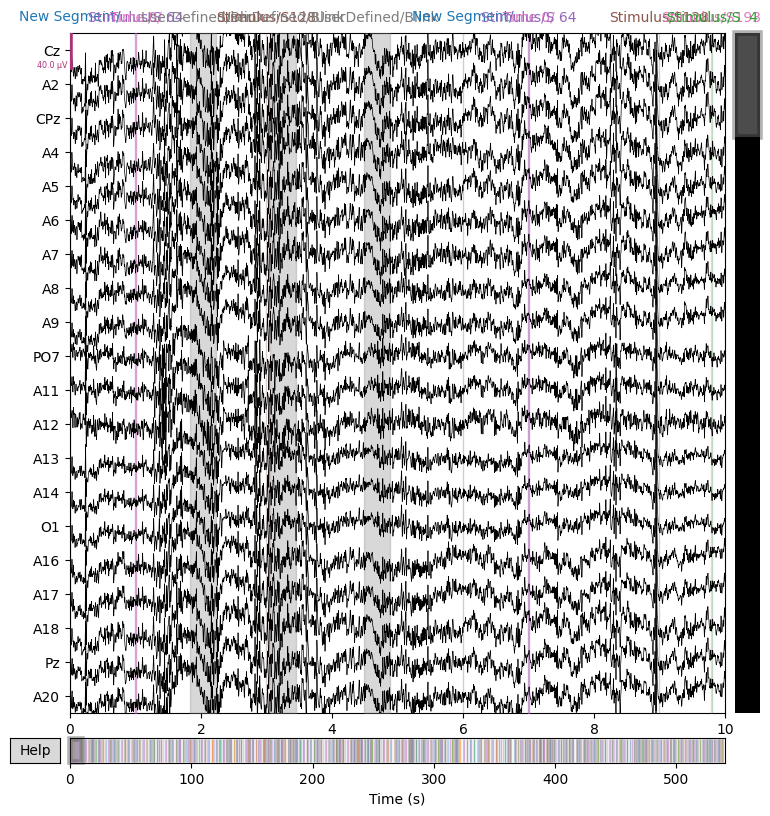

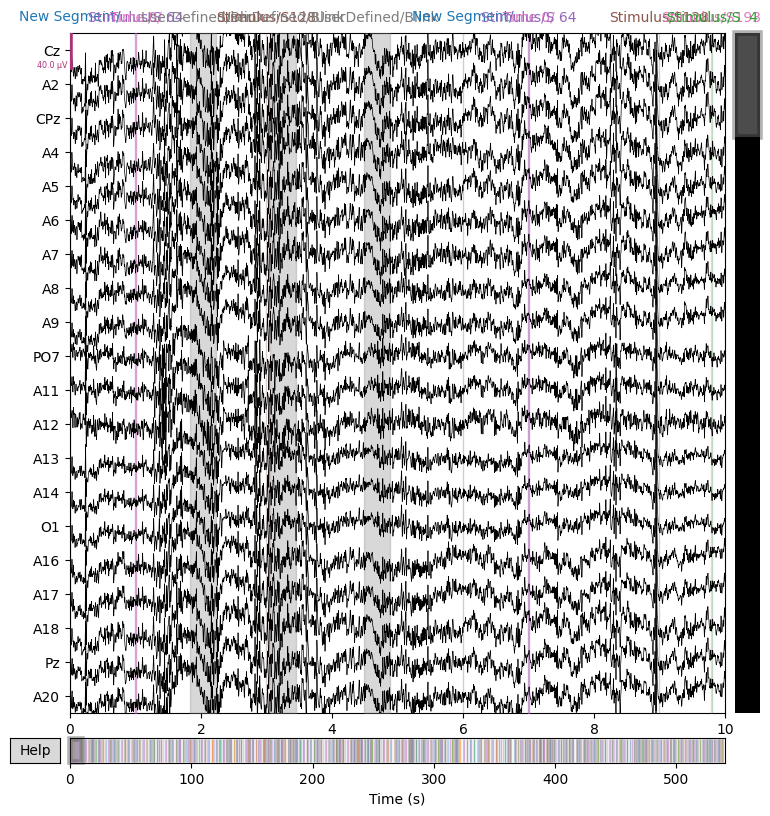

In [8]:
participant_id = participant_ids[0]
raw = mne.io.read_raw_brainvision(
    data_path + f"sub-{participant_id}_task-proposer_run-1_eeg.vhdr",
).pick_types(eeg=True, exclude=[]) # leave only eeg channels (remove externals)

raw.plot(show=False)

In [9]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Cz, A2, CPz, A4, A5, A6, A7, A8, A9, PO7, A11, A12, A13, A14, ...
 chs: 130 EEG
 custom_ref_applied: False
 dig: 133 items (3 Cardinal, 130 EEG)
 highpass: 0.0 Hz
 lowpass: 1024.0 Hz
 meas_date: 2014-11-12 08:47:53 UTC
 nchan: 130
 projs: []
 sfreq: 2048.0 Hz
>

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


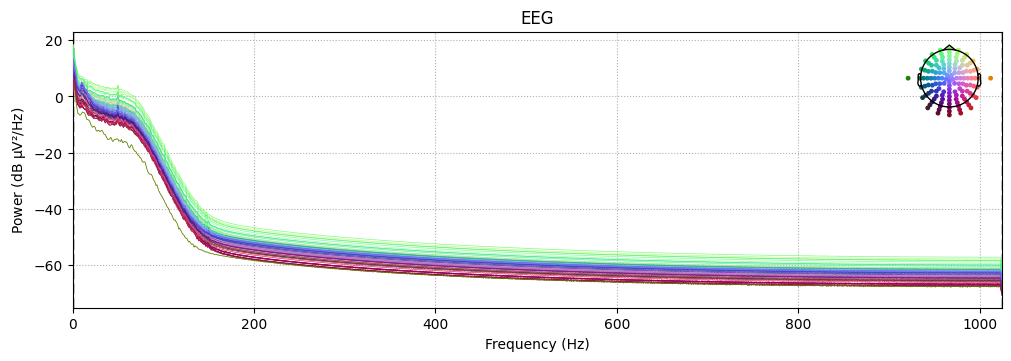

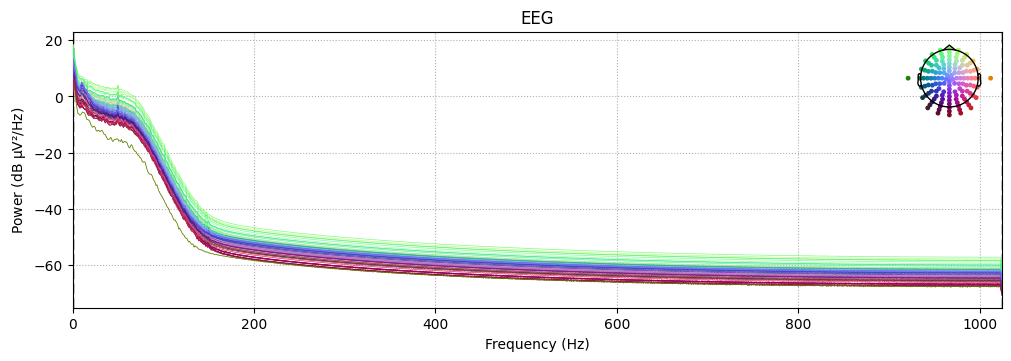

In [10]:
participant_id = participant_ids[0]

spectrum = raw.compute_psd(method="welch")
spectrum.plot(amplitude=False, show=False)

In [11]:
raw.get_data().shape

(130, 1105920)

In [12]:
# channels = raw.ch_names
channels = list(set(raw.ch_names) & \
    set(
        ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3',
       'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1',
       'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz',
       'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4',
       'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4',
       'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8',
       'P10', 'PO8', 'PO4', 'O2']
    ))
print("['" + "', '".join(channels) + "']")
len(channels)

['C2', 'O2', 'POz', 'T7', 'FT8', 'AF8', 'Pz', 'P7', 'CPz', 'Fpz', 'C3', 'C6', 'O1', 'PO8', 'Fp2', 'FT7', 'PO7', 'AFz', 'C5', 'P8', 'F7', 'TP8', 'C1', 'TP7', 'Cz', 'Iz', 'F8', 'T8', 'AF7', 'Fz', 'FCz', 'C4', 'Fp1', 'Oz']


34

In [13]:
channels = ['C4', 'Fp1', 'C5', 'O2', 'Cz', 'TP8', 'Fpz', 'Pz', 'CPz', 'AF8', 'PO7',
            'C1', 'POz', 'AFz', 'AF7', 'P7', 'FT8', 'Iz', 'T8', 'C6', 'TP7', 'Fz',
            'F7', 'FT7', 'C3', 'O1', 'PO8', 'F8', 'P8', 'Fp2', 'FCz', 'C2', 'Oz', 'T7']
print(' '.join(channels))

C4 Fp1 C5 O2 Cz TP8 Fpz Pz CPz AF8 PO7 C1 POz AFz AF7 P7 FT8 Iz T8 C6 TP7 Fz F7 FT7 C3 O1 PO8 F8 P8 Fp2 FCz C2 Oz T7


In [14]:
channels = list(raw.ch_names)[:64]
print(' '.join(channels))
len(channels)

Cz A2 CPz A4 A5 A6 A7 A8 A9 PO7 A11 A12 A13 A14 O1 A16 A17 A18 Pz A20 POz A22 Oz A24 Iz A26 A27 O2 A29 A30 A31 A32 B1 B2 B3 B4 B5 B6 PO8 B8 B9 B10 P8 B12 B13 TP8 B15 B16 B17 B18 B19 B20 B21 B22 B23 B24 B25 T8 FT8 B28 B29 B30 B31 B32


64

In [15]:
raw.resample(512).pick(channels).get_data().shape # memory optim

(64, 276480)

In [16]:
spectrum.get_data().shape

(130, 1025)

In [17]:
participants = pd.read_csv("./data/participants.tsv", sep='\t')
display(participants.head(3))
display(participants.tail(3))

,participant_id,group
0,sub-000,HC
1,sub-001,HC
2,sub-002,HC


,participant_id,group
40,sub-040,P
41,sub-041,P
42,sub-042,P


### Freq Data

In [18]:
raw.get_data().shape

(64, 276480)

In [19]:
freq_data = pd.DataFrame(columns=['run_name', 'asmr_type']+channels)
one_recording_len = 1024

for participant_id in tqdm(participant_ids): # sub-042 is broken
    participant_id = 'sub-' + participant_id

    ! rm -r data/ds004000-download/
    ! mkdir data/ds004000-download/
    ! aws s3 sync --no-sign-request s3://openneuro.org/ds004000/{participant_id}/eeg/ data/ds004000-download/

    raw = mne.io.read_raw_brainvision(
        data_path + f"{participant_id}_task-proposer_run-1_eeg.vhdr",
    ).pick_types(eeg=True, exclude=[]) # leave only eeg channels (remove externals)

    event = participants[participants.participant_id == participant_id].group.values[0]

    freqs = raw.resample(512).pick(channels).get_data()
    for i in range(freqs.shape[1] // one_recording_len):

        n = len(freq_data)

        freq_data.loc[n, ['run_name', 'asmr_type']] = participant_id + f"-{i}", event
        freq_data.loc[n, channels] = list(freqs[:, i*one_recording_len:(i+1)*one_recording_len])

! rm -r data/ds004000-download/

  0%|          | 0/10 [00:00<?, ?it/s]

download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_electrodes.tsv to data/ds004000-download/sub-000_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-000_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-proposer_run-1_eeg.json to data/ds004000-download/sub-000_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-responder_run-1_eeg.json to data/ds004000-download/sub-000_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-000_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-000_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-000/eeg/sub-000_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-000_ta

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 10%|█         | 1/10 [00:30<04:35, 30.65s/it]

download: s3://openneuro.org/ds004000/sub-001/eeg/sub-001_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-001_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-001/eeg/sub-001_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-001_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-001/eeg/sub-001_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-001_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-001/eeg/sub-001_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-001_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-001/eeg/sub-001_task-proposer_run-1_eeg.json to data/ds004000-download/sub-001_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-001/eeg/sub-001_electrodes.tsv to data/ds004000-download/sub-001_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-001/eeg/sub-001_task-responder_run-1_eeg.json to data/ds004000-download/sub-001_ta

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 20%|██        | 2/10 [00:44<02:46, 20.78s/it]

download: s3://openneuro.org/ds004000/sub-002/eeg/sub-002_electrodes.tsv to data/ds004000-download/sub-002_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-002/eeg/sub-002_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-002_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-002/eeg/sub-002_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-002_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-002/eeg/sub-002_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-002_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-002/eeg/sub-002_task-responder_run-1_eeg.json to data/ds004000-download/sub-002_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-002/eeg/sub-002_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-002_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-002/eeg/sub-002_task-proposer_run-1_eeg.json to data/ds004000-download/sub-002_t

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 30%|███       | 3/10 [01:15<02:57, 25.30s/it]

download: s3://openneuro.org/ds004000/sub-003/eeg/sub-003_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-003_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-003/eeg/sub-003_electrodes.tsv to data/ds004000-download/sub-003_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-003/eeg/sub-003_task-proposer_run-1_eeg.json to data/ds004000-download/sub-003_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-003/eeg/sub-003_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-003_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-003/eeg/sub-003_task-responder_run-1_eeg.json to data/ds004000-download/sub-003_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-003/eeg/sub-003_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-003_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-003/eeg/sub-003_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-003_ta

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 40%|████      | 4/10 [01:41<02:34, 25.79s/it]

download: s3://openneuro.org/ds004000/sub-004/eeg/sub-004_electrodes.tsv to data/ds004000-download/sub-004_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-004/eeg/sub-004_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-004_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-004/eeg/sub-004_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-004_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-004/eeg/sub-004_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-004_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-004/eeg/sub-004_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-004_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-004/eeg/sub-004_task-responder_run-1_eeg.json to data/ds004000-download/sub-004_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-004/eeg/sub-004_task-proposer_run-1_eeg.json to data/ds004000-download/sub-004_t

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 50%|█████     | 5/10 [02:08<02:11, 26.27s/it]

download: s3://openneuro.org/ds004000/sub-005/eeg/sub-005_electrodes.tsv to data/ds004000-download/sub-005_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-005/eeg/sub-005_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-005_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-005/eeg/sub-005_task-responder_run-1_eeg.json to data/ds004000-download/sub-005_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-005/eeg/sub-005_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-005_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-005/eeg/sub-005_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-005_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-005/eeg/sub-005_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-005_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-005/eeg/sub-005_task-proposer_run-1_eeg.json to data/ds004000-download/sub-005_t

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 60%|██████    | 6/10 [02:36<01:46, 26.63s/it]

download: s3://openneuro.org/ds004000/sub-006/eeg/sub-006_electrodes.tsv to data/ds004000-download/sub-006_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-006/eeg/sub-006_task-proposer_run-1_eeg.json to data/ds004000-download/sub-006_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-006/eeg/sub-006_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-006_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-006/eeg/sub-006_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-006_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-006/eeg/sub-006_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-006_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-006/eeg/sub-006_task-responder_run-1_eeg.json to data/ds004000-download/sub-006_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-006/eeg/sub-006_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-006_ta

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 70%|███████   | 7/10 [03:04<01:21, 27.30s/it]

download: s3://openneuro.org/ds004000/sub-007/eeg/sub-007_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-007_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-007/eeg/sub-007_electrodes.tsv to data/ds004000-download/sub-007_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-007/eeg/sub-007_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-007_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-007/eeg/sub-007_task-proposer_run-1_eeg.json to data/ds004000-download/sub-007_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-007/eeg/sub-007_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-007_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-007/eeg/sub-007_task-responder_run-1_eeg.json to data/ds004000-download/sub-007_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-007/eeg/sub-007_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-007_t

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 80%|████████  | 8/10 [03:21<00:48, 24.05s/it]

download: s3://openneuro.org/ds004000/sub-008/eeg/sub-008_task-proposer_run-1_eeg.json to data/ds004000-download/sub-008_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-008/eeg/sub-008_electrodes.tsv to data/ds004000-download/sub-008_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-008/eeg/sub-008_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-008_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-008/eeg/sub-008_task-responder_run-1_eeg.json to data/ds004000-download/sub-008_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-008/eeg/sub-008_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-008_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-008/eeg/sub-008_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-008_task-responder_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-008/eeg/sub-008_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-008_t

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
 90%|█████████ | 9/10 [03:38<00:21, 21.58s/it]

download: s3://openneuro.org/ds004000/sub-009/eeg/sub-009_task-proposer_run-1_eeg.json to data/ds004000-download/sub-009_task-proposer_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-009/eeg/sub-009_task-responder_run-1_eeg.vhdr to data/ds004000-download/sub-009_task-responder_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-009/eeg/sub-009_task-proposer_run-1_eeg.vhdr to data/ds004000-download/sub-009_task-proposer_run-1_eeg.vhdr
download: s3://openneuro.org/ds004000/sub-009/eeg/sub-009_task-proposer_run-1_eeg.vmrk to data/ds004000-download/sub-009_task-proposer_run-1_eeg.vmrk
download: s3://openneuro.org/ds004000/sub-009/eeg/sub-009_electrodes.tsv to data/ds004000-download/sub-009_electrodes.tsv
download: s3://openneuro.org/ds004000/sub-009/eeg/sub-009_task-responder_run-1_eeg.json to data/ds004000-download/sub-009_task-responder_run-1_eeg.json
download: s3://openneuro.org/ds004000/sub-009/eeg/sub-009_task-responder_run-1_eeg.vmrk to data/ds004000-download/sub-009_ta

<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: No coordinate information found for channels ['EXG1', 'EXG2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(
<ipython-input-19-59451e7e4a37>:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['EXG1', 'EXG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(
100%|██████████| 10/10 [04:06<00:00, 24.64s/it]


In [20]:
freq_data.sample(3)

,run_name,asmr_type,Cz,A2,CPz,A4,A5,A6,A7,A8,...,B23,B24,B25,T8,FT8,B28,B29,B30,B31,B32
2139,sub-008-90,HC,"[5.044801597725729e-06, 8.763711552634907e-06,...","[3.986731636471485e-06, 8.740009962357592e-06,...","[5.284668476907975e-06, 1.0248076548036836e-05...","[7.814761437154995e-06, 1.655409398543599e-05,...","[4.778750178698596e-06, 1.1234933942323517e-05...","[2.8076212700293475e-06, 1.1388247451219888e-0...","[2.020901209482414e-06, 9.883536294009869e-06,...","[-3.0995125580327926e-06, -1.442296112337735e-...",...,"[5.387569355569816e-06, 1.012065844864268e-05,...","[5.388052114835851e-06, 1.2927265557183994e-05...","[4.8154797206952565e-06, 1.2433673260948302e-0...","[4.261651917158625e-06, 1.1175465286081332e-05...","[3.934541321277623e-06, 7.520129695109567e-06,...","[2.8777275122810983e-06, 6.286251499464254e-06...","[2.9785480054836574e-06, 6.689657426133722e-06...","[2.4454136183532428e-06, 5.508669726794834e-06...","[2.311470453329192e-06, 5.920466176377714e-06,...","[1.8539846159158427e-06, 1.2389964712629096e-0..."
1589,sub-006-29,HC,"[-2.2003711860978407e-05, -2.0708442089772795e...","[-1.6552466742126312e-05, -1.455661241209819e-...","[-2.289442972992573e-05, -2.0861796814438645e-...","[-2.154698979519075e-05, -2.000318836103184e-0...","[-1.3874296236982125e-05, -1.372860284855153e-...","[-1.6254259264432498e-05, -1.707102706461335e-...","[-1.0639558236344694e-05, -1.1825038437071779e...","[2.1017388444792756e-05, 1.7847728290765857e-0...",...,"[-2.034171281091554e-05, -1.8257511141275503e-...","[-1.5072135209896731e-05, -1.3642241291277529e...","[-1.5188438690468583e-05, -1.3891803110029801e...","[-1.595362572306696e-05, -1.419414975214362e-0...","[-1.7049102840027624e-05, -1.715965164899269e-...","[-1.6266096687350027e-05, -1.6703810924037297e...","[-1.6132238609369104e-05, -1.6368209880528226e...","[-2.142031144868549e-05, -2.097611321429671e-0...","[-2.0553220859044938e-05, -1.8783859145157747e...","[-2.1751294679453536e-05, -1.9430610570433522e..."
1921,sub-007-103,HC,"[1.2216437112928411e-05, 1.2003857201380417e-0...","[8.871574828739325e-06, 9.205195115247456e-06,...","[-7.597276602125405e-07, 1.055094700568277e-06...","[-6.084888597421784e-07, 1.5840107667733376e-0...","[3.4429953163802503e-06, 6.074393533942719e-06...","[-8.493124467141429e-07, 2.161247509173335e-06...","[1.1536640566549054e-05, 1.3470634304711032e-0...","[-4.057709221375324e-06, -1.9160153198093164e-...",...,"[1.1182240643291063e-05, 1.175814981843991e-05...","[-8.897595105002203e-06, -7.791576871408342e-0...","[3.6792779583357886e-05, 3.193984007490002e-05...","[-3.76836095356979e-06, -6.286234950305343e-06...","[1.715265651624658e-05, 1.7109702150839738e-05...","[7.728294599615218e-06, 8.575943713587617e-06,...","[1.5970619620258176e-05, 1.7253999598762622e-0...","[1.636163602266424e-05, 1.6676908008091246e-05...","[1.6887890782356924e-05, 1.7105199751072914e-0...","[1.5147353854464243e-05, 1.485525520576508e-05..."


In [21]:
freq_data.shape

(2574, 66)

In [22]:
os.makedirs(save_path, exist_ok=True)

In [23]:
freq_data.to_pickle(save_path + "freq_data.pkl")

## TopoEEG

In [24]:
!rm -rf TopoEEG

In [25]:
!git clone https://github.com/le-beda/TopoEEG.git

Cloning into 'TopoEEG'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 90 (delta 43), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (90/90), 51.38 KiB | 2.70 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [26]:
# ! pip install -r /content/TopoEEG/requirements.txt

In [27]:
# !pip install --upgrade --force-reinstall numpy
# !pip install --upgrade --force-reinstall scipy pandas
# !pip install --upgrade --force-reinstall scikit-learn

In [28]:
! python -W ignore /content/TopoEEG/TopoEEG_run.py \
    --data_ratio 0.05 \
    --freq_data_path data/compressed/freq_data.pkl \
    --channels Cz A2 CPz A4 A5 A6 A7 A8 A9 PO7 A11 A12 A13 A14 O1 A16 A17 A18 Pz A20 POz A22 Oz A24 Iz A26 A27 O2 A29 A30 A31 A32 B1 B2 B3 B4 B5 B6 PO8 B8 B9 B10 P8 B12 B13 TP8 B15 B16 B17 B18 B19 B20 B21 B22 B23 B24 B25 T8 FT8 B28 B29 B30 B31 B32 \
    --positive_class P \
    --negative_class HC \
    --feature_types reg1 reg2 topo1 topo2 \
    --topo1_n_long_living 20 \
    --n_psd_output 1024 \
    \
    --num_epochs 500 \
    --batch_size 64

ModelArgs(channels=['Cz', 'A2', 'CPz', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'PO7', 'A11', 'A12', 'A13', 'A14', 'O1', 'A16', 'A17', 'A18', 'Pz', 'A20', 'POz', 'A22', 'Oz', 'A24', 'Iz', 'A26', 'A27', 'O2', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'PO8', 'B8', 'B9', 'B10', 'P8', 'B12', 'B13', 'TP8', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'T8', 'FT8', 'B28', 'B29', 'B30', 'B31', 'B32'], all_classes=['B1(Pre_Baseline)', 'B2(Pre_Relaxed)', 'B3(WeakASMR)', 'B4(StrongASMR)', 'B5(Post_Relaxed)', 'B6(Post_Baseline)'], positive_class=['P'], negative_class=['HC'], reg1_order=20, topo1_n_long_living=20, classifier_base_n_out=8, fusion_method='feature_level', topo1_weight=0.25, topo2_weight=0.25, reg1_weight=0.25, reg2_weight=0.25)
Complex feature extraction in domain: all
Pre even classes:	 (2574, 66)
Post even classes:	 (2574, 66)
Post data sampling:	 128
compile X: 100% 128/128 [00:00<00:00, 1793.76it/s]
Effective window size : 448.000 (

In [29]:
! python -W ignore /content/TopoEEG/TopoEEG_run.py \
    --data_ratio 0.05 \
    --freq_data_path data/compressed/freq_data.pkl \
    --channels Cz A2 CPz A4 A5 A6 A7 A8 A9 PO7 A11 A12 A13 A14 O1 A16 A17 A18 Pz A20 POz A22 Oz A24 Iz A26 A27 O2 A29 A30 A31 A32 B1 B2 B3 B4 B5 B6 PO8 B8 B9 B10 P8 B12 B13 TP8 B15 B16 B17 B18 B19 B20 B21 B22 B23 B24 B25 T8 FT8 B28 B29 B30 B31 B32 \
    --positive_class P \
    --negative_class HC \
    --feature_types reg1 reg2 \
    --topo1_n_long_living 20 \
    --n_psd_output 1024 \
    \
    --num_epochs 500 \
    --batch_size 64


ModelArgs(channels=['Cz', 'A2', 'CPz', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'PO7', 'A11', 'A12', 'A13', 'A14', 'O1', 'A16', 'A17', 'A18', 'Pz', 'A20', 'POz', 'A22', 'Oz', 'A24', 'Iz', 'A26', 'A27', 'O2', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'PO8', 'B8', 'B9', 'B10', 'P8', 'B12', 'B13', 'TP8', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'T8', 'FT8', 'B28', 'B29', 'B30', 'B31', 'B32'], all_classes=['B1(Pre_Baseline)', 'B2(Pre_Relaxed)', 'B3(WeakASMR)', 'B4(StrongASMR)', 'B5(Post_Relaxed)', 'B6(Post_Baseline)'], positive_class=['P'], negative_class=['HC'], reg1_order=20, topo1_n_long_living=20, classifier_base_n_out=8, fusion_method='feature_level', topo1_weight=0.25, topo2_weight=0.25, reg1_weight=0.25, reg2_weight=0.25)
Complex feature extraction in domain: all
Pre even classes:	 (2574, 66)
Post even classes:	 (2574, 66)
Post data sampling:	 128
compile X: 100% 128/128 [00:00<00:00, 1286.22it/s]
Effective window size : 448.000 (

In [30]:
! python -W ignore /content/TopoEEG/TopoEEG_run.py \
    --data_ratio 0.05 \
    --freq_data_path data/compressed/freq_data.pkl \
    --channels Cz A2 CPz A4 A5 A6 A7 A8 A9 PO7 A11 A12 A13 A14 O1 A16 A17 A18 Pz A20 POz A22 Oz A24 Iz A26 A27 O2 A29 A30 A31 A32 B1 B2 B3 B4 B5 B6 PO8 B8 B9 B10 P8 B12 B13 TP8 B15 B16 B17 B18 B19 B20 B21 B22 B23 B24 B25 T8 FT8 B28 B29 B30 B31 B32 \
    --positive_class P \
    --negative_class HC \
    --feature_types topo1 topo2 \
    --topo1_n_long_living 20 \
    --n_psd_output 1024 \
    \
    --num_epochs 500 \
    --batch_size 64


ModelArgs(channels=['Cz', 'A2', 'CPz', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'PO7', 'A11', 'A12', 'A13', 'A14', 'O1', 'A16', 'A17', 'A18', 'Pz', 'A20', 'POz', 'A22', 'Oz', 'A24', 'Iz', 'A26', 'A27', 'O2', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'PO8', 'B8', 'B9', 'B10', 'P8', 'B12', 'B13', 'TP8', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'T8', 'FT8', 'B28', 'B29', 'B30', 'B31', 'B32'], all_classes=['B1(Pre_Baseline)', 'B2(Pre_Relaxed)', 'B3(WeakASMR)', 'B4(StrongASMR)', 'B5(Post_Relaxed)', 'B6(Post_Baseline)'], positive_class=['P'], negative_class=['HC'], reg1_order=20, topo1_n_long_living=20, classifier_base_n_out=8, fusion_method='feature_level', topo1_weight=0.25, topo2_weight=0.25, reg1_weight=0.25, reg2_weight=0.25)
Complex feature extraction in domain: all
Pre even classes:	 (2574, 66)
Post even classes:	 (2574, 66)
Post data sampling:	 128
compile X: 100% 128/128 [00:00<00:00, 2067.07it/s]
Effective window size : 448.000 (

In [32]:
# ! python -W ignore /content/TopoEEG/TopoEEG_run.py \
#     --data_ratio 0.5 \
#     --freq_data_path data/compressed/freq_data.pkl \
#     --channels Cz A2 CPz A4 A5 A6 A7 A8 A9 PO7 A11 A12 A13 A14 O1 A16 A17 A18 Pz A20 POz A22 Oz A24 Iz A26 A27 O2 A29 A30 A31 A32 B1 B2 B3 B4 B5 B6 PO8 B8 B9 B10 P8 B12 B13 TP8 B15 B16 B17 B18 B19 B20 B21 B22 B23 B24 B25 T8 FT8 B28 B29 B30 B31 B32 \
#     --positive_class P \
#     --negative_class HC \
#     --feature_types topo1 topo2 reg1 reg2 \
#     --topo1_n_long_living 20 \
#     --n_psd_output 1024 \
#     \
#     --num_epochs 1000 \
#     --batch_size 64